# Implementing Linear and Polynomial Regression Machine Learning Models

## Introduction

This notebook will cover the idea of a cost function and how gradient descent can be used to minimize the cost function. And finally, these ideas will be used to build a linear/polynomial regression machine learning model.

In [1]:
# import needed modules
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from celluloid import Camera
plt.rcParams['animation.html'] = 'html5'

In [2]:
# utility funciton for creating animation
def create_animation(X, y, theta_history, J_history, deg): 
    # setup X_linspace
    m = y.size
    X_linspace = np.linspace(X.min(), X.max(), num=100)
    X_linspace = np.stack([np.ones(m), X_linspace], axis=1)
    for i in range(2,deg+1):
        X_linspace = np.concatenate([X_linspace, (X_linspace[:,1]**i).reshape(-1,1)], axis=1)
    
    # make plots and animation
    fig, axes = plt.subplots(1, 2, figsize=[8,4], dpi=100)
    camera = Camera(fig)
    n = len(J_history)
    step = n//100
    for i in range(0,n,step):
        axes[0].plot(X, y, 'bo', markersize=5)
        theta_i = np.array(theta_history[i])
        y_preds = np.sum(X_linspace*theta_i, axis=1)
        axes[0].plot(X_linspace[:,1], y_preds, 'r-')
        axes[1].plot( np.arange(0,i,2), J_history[0:i:2], '-b' )
        axes[0].set(xlabel='X', ylabel='y')
        axes[1].set(xlabel='Iteration', ylabel='MSE Error')
        
        camera.snap()
    plt.close()        
    return camera

# Cost function

A cost function quantifies the error between the expected values and the predicted values. It is the goal of the machine learning model to reduce the error between the predicted and expected values. A mean squared error (MSE) cost function can be defined as:
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 $$

where $m$ is the number of training example, $y^{(i)}$ is the expected values, and $h_{\theta}(x^{(i)})$ is the predicted values (or hypothesis) defined as:
$$ h_\theta(x) = \theta^Tx $$


In [3]:
def costFunction(X, y, theta):
    # number of training examples
    m = y.size
    # cost function
    J = np.sum( 1/(2*m) * (X.dot(theta) - y)**2 )
    return J

# Batch gradient descent

Gradient descent is used to calculate the parameters ($\theta_j$) that would minimize the cost function (or MSE in this case)
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} $$

In [4]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # number of training examples
    m = y.size
    
    # make a copy of theta
    theta = theta.copy()
    
    # theta and cost function history
    theta_history = []
    J_history = []
    
    # gradient decent iterations
    for i in range(num_iters):
        theta = theta - alpha/m * (X.dot(theta) - y).dot(X)
        theta_history.append(theta)
        J_history.append(costFunction(X, y, theta))
        
    return theta, theta_history, J_history

# Example 1: Linear regression

Let's test out the algorithm we have put together so far on a toy linear dataset as shown below:

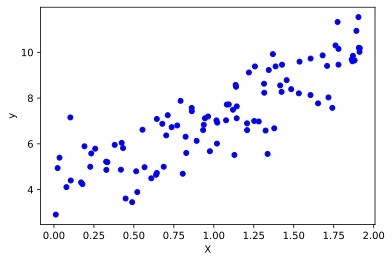

In [5]:
X = 2 * np.random.rand(100)
y = 4 + 3 * X + np.random.randn(100)

plt.plot(X, y, 'bo', markersize=5)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Calculate $\theta_j$ using gradient descent: 

In [6]:
m = y.shape
Xj = np.stack([np.ones(m), X], axis=1)

# initialize parameters
#theta = np.zeros(2)
theta = np.array([10,-4])
iterations = 2000
alpha = 0.01

theta, theta_history, J_history = gradientDescent(Xj ,y, theta, alpha, iterations)

Create animation to see the inner workings of gradient descent:

In [7]:
camera = create_animation(X, y, theta_history, J_history, deg=1)
animation = camera.animate() 
animation

# Example 2: Polynomial regression

Let's test out the algorithm we have put together so far on a toy polynomial dataset as shown below:

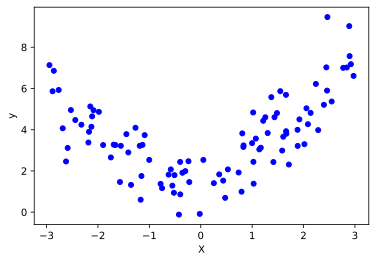

In [8]:
X = 6 * np.random.rand(100) - 3
y = 0.5 * X**2 + 0.4*X + 2 + np.random.randn(100)

plt.plot(X, y, 'bo', markersize=5)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Add $x^{2}$ to the features and calculate $\theta_j$ using gradient descent: 

In [9]:
m = y.shape
Xj = np.stack([np.ones(m), X, X**2], axis=1)

# initialize parameters
#theta = np.zeros(Xi.shape[1])
theta = np.array([5,-2,0])
iterations = 800
alpha = 0.01

theta, theta_history, J_history = gradientDescent(Xj ,y, theta, alpha, iterations)

Create animation to see the inner workings of gradient descent:

In [10]:
camera = create_animation(X, y, theta_history, J_history, deg=2)
animation = camera.animate() 
animation